In [2]:
import tensorflow as tf
from joblib import load
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [64]:
def load_dataset():
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    # Load the CSV file
    # df = pd.read_csv("/mnt/e/Python projects/Movie Recomender/normalized_user_movie_data.csv")

    item_train=pd.read_csv("/mnt/e/Python projects/Movie Recomender/data/content_item_train.csv")
    user_train=pd.read_csv("/mnt/e/Python projects/Movie Recomender/data/content_user_train.csv")
    y_train=pd.read_csv("/mnt/e/Python projects/Movie Recomender/data/content_y_train.csv")
    
    scalerItem = StandardScaler()
    scalerItem.fit(item_train)
    item_train = scalerItem.transform(item_train)
    
    scalerUser = StandardScaler()
    scalerUser.fit(user_train)
    user_train = scalerUser.transform(user_train)
    
    scalerTarget = MinMaxScaler((-1, 1))
    scalerTarget.fit(y_train)
    y_train = scalerTarget.transform(y_train)


    item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
    user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
    y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
    
    
    from joblib import dump,load
    dump(scalerUser,'UserScaler.joblib')
    dump(scalerItem,'MovieScaler.joblib')
    dump(scalerTarget,'MinMaxRatingScaler.joblib')
   
    # X=df
    # # UserTrain=df.iloc[:,2:20]
    # # MovieTrain=df.iloc[:,20:39]
    # y=df['rating']
    
       
    # Split the data into train (80%), temp (20%) split
    # X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Split the temp data into validation (10%) and test (10%) sets
    # X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    # UserTrain=X_train.iloc[:,2:20]
    # MovieTrain=X_train.iloc[:,20:39]
    # UserDev=X_dev.iloc[:,2:20]
    # MovieDev=X_dev.iloc[:,20:39]
    # UserTest=X_test.iloc[:,2:20]
    # MovieTest=X_test.iloc[:,20:39]
    return [user_train[:,3:],item_train[:,2:],y_train,user_test[:,3:],item_test[:,2:],y_test]
    #Display the sizes of each set
    # print(f"Training set: {UserTrain.info()},{MovieTrain.info()}, {y_train.shape}")
    # print(f"Validation (Dev) set: {UserDev.shape},{MovieDev.shape}, {y_dev.shape}")
    # print(f"Test set: {UserTest.shape},{MovieTest.shape}, {y_test.shape}")
    #print(X_train)
    # UserTest.to_csv("UserTest.csv", index=False)
    # MovieTest.to_csv("MovieTest.csv",index=False)
    # y_test.to_csv("y_test.csv", index=False)


In [65]:
load_dataset()

[array([[-0.75002545, -0.71201645,  0.05438833, ..., -0.63795668,
         -0.65475297, -0.73380805],
        [-0.4964236 , -0.74715933, -0.08397947, ..., -0.55450152,
         -0.46625411, -0.3946172 ],
        [ 0.3489159 , -0.37815909,  0.38434231, ...,  0.0018662 ,
          0.43274043, -0.02312246],
        ...,
        [ 0.02768689,  0.18412699, -0.03076109, ..., -0.10940734,
          0.21524175, -0.2169458 ],
        [ 1.29569614,  1.20327051,  0.79944571, ...,  1.46233149,
          0.91123753,  1.1398176 ],
        [ 0.0107801 ,  0.09626979,  0.29919289, ...,  0.07141217,
          0.31674114,  0.1060931 ]]),
 array([[-0.74706775, -0.71224094, -0.69696856, ..., -0.39919489,
         -0.50822894, -0.65974585],
        [-1.02211109, -0.71224094,  1.43478495, ..., -0.39919489,
         -0.50822894, -0.65974585],
        [ 1.16171783,  1.40401926, -0.69696856, ..., -0.39919489,
          1.96761721,  1.51573519],
        ...,
        [-0.09735632, -0.71224094, -0.69696856, ..., -

In [66]:
UserTrain,MovieTrain,y_train,UserDev,MovieDev,y_dev=load_dataset()

In [67]:
from tensorflow.keras.layers import Layer
class L2Normalization(Layer):
    def call(self, inputs):
        return tf.linalg.l2_normalize(inputs, axis=1)

def build_model():
    input1 = tf.keras.Input(shape=(14,))
    input2 = tf.keras.Input(shape=(15,))

    # First dense layer
    x1 = tf.keras.layers.Dense(45, activation="relu", kernel_initializer="he_normal")(input1)

    x1 = tf.keras.layers.Dense(33, activation="relu", kernel_initializer="he_normal")(x1)
    x1 = tf.keras.layers.Dense(45, activation="relu", kernel_initializer="he_normal")(x1)
    # x1 = tf.keras.layers.Dense(163, activation="relu", kernel_initializer="he_normal")(x1)

    # Output layer
    embedding1 = tf.keras.layers.Dense(28, activation="relu")(x1)

     # First dense layer
    x2 = tf.keras.layers.Dense(24, activation="relu", kernel_initializer="he_normal")(input2)

    x2 = tf.keras.layers.Dense(13, activation="relu", kernel_initializer="he_normal")(x2)
    x2 = tf.keras.layers.Dense(48, activation="relu", kernel_initializer="he_normal")(x2)
    # x2 = tf.keras.layers.Dense(163, activation="relu", kernel_initializer="he_normal")(x2)

    # Output layer
    embedding2 = tf.keras.layers.Dense(28, activation="relu")(x2)


    emb1 = L2Normalization()(embedding1)
    emb2 = L2Normalization()(embedding2)
    #emb1=tf.linalg.l2_normalize(embedding1, axis=1)
    #emb2=tf.linalg.l2_normalize(embedding2, axis=1)

    output = tf.keras.layers.Dot(axes=1)([emb1, emb2])

    # Create the model
    model = tf.keras.Model(inputs=[input1,input2], outputs=output)

    return model

In [68]:
model=build_model()

In [69]:
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003754957799830956),
        loss=tf.keras.losses.mse,
        metrics=['r2_score','mean_squared_error']
    )

In [70]:
history=model.fit(
        [UserTrain,MovieTrain], y_train,
        epochs=30,
        validation_data=([UserDev,MovieDev], y_dev)
    )


Epoch 1/30
  68/1273 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1954 - mean_squared_error: 0.1954 - r2_score: -0.0071

I0000 00:00:1736439561.897855   92579 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_3', 4 bytes spill stores, 4 bytes spill loads



1273/1273 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.1427 - mean_squared_error: 0.1427 - r2_score: 0.2135 - val_loss: 0.1240 - val_mean_squared_error: 0.1240 - val_r2_score: 0.3229
Epoch 2/30
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1205 - mean_squared_error: 0.1205 - r2_score: 0.3381 - val_loss: 0.1192 - val_mean_squared_error: 0.1192 - val_r2_score: 0.3490
Epoch 3/30
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1159 - mean_squared_error: 0.1159 - r2_score: 0.3622 - val_loss: 0.1166 - val_mean_squared_error: 0.1166 - val_r2_score: 0.3631
Epoch 4/30
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1105 - mean_squared_error: 0.1105 - r2_score: 0.3827 - val_loss: 0.1142 - val_mean_squared_error: 0.1142 - val_r2_score: 0.3764
Epoch 5/30
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1085 - mean_squared_error: 0.1085 - r2_score: 0.3958 - val_loss: 0.1132 - val_mean_squared_error: 0.1132 - val_r2_score: 0.3819
Epoch 6/30
1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/s

In [71]:
loss=history.history['loss']
val_loss=history.history['val_loss']

r2Score=history.history['r2_score']
valR2Score=history.history['val_r2_score']

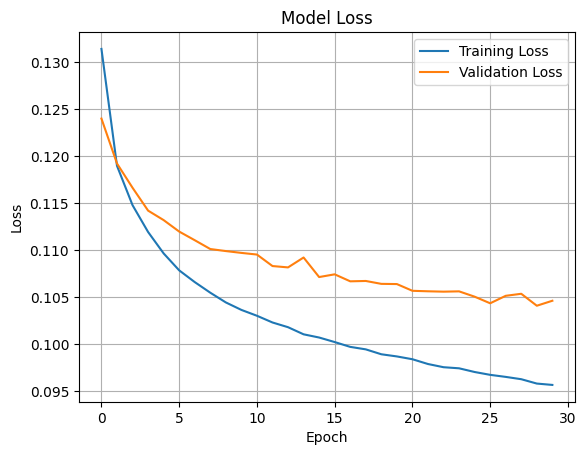

In [72]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit
# Plot training & validation loss values
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
model.save('my_model.keras')

In [78]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 45)        │        675 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 24)        │        384 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 33)        │      1,518 │ dense_40[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 13)        │        325 │ dense_44[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 45)        │      1,530 │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 48)        │        672 │ dense_45[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 28)        │      1,288 │ dense_42[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 28)        │      1,372 │ dense_46[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l2_normalization_12 │ (None, 28)        │          0 │ dense_43[0][0]    │
│ (L2Normalization)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l2_normalization_13 │ (None, 28)        │          0 │ dense_47[0][0]    │
│ (L2Normalization)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_6 (Dot)         │ (None, 1)         │          0 │ l2_normalization… │
│                     │                   │            │ l2_normalization… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,294 (91.00 KB)

 Trainable params: 7,764 (30.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,530 (60.67 KB)

In [76]:
import keras
@keras.saving.register_keras_serializable(package="MyLayers")
class L2Normalization(Layer):
    def call(self, inputs):
        return tf.linalg.l2_normalize(inputs, axis=1)
